# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix (no more available)
from sklearn.metrics import ConfusionMatrixDisplay # new version
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ubaydulsami/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ubaydulsami/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ubaydulsami/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)

(11314, 4)


In [3]:
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [4]:
# 3. Inspect / remove nulls and duplicates
# inspecting nulls
df.isnull().sum()
# no null values in the dataset

# inspecting duplicates
df.duplicated().sum()
# no duplicate values in the dataset

0

In [5]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

topic_category
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [6]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

# function to make all text lowercase.

def all_lowercase(string):
    return string.lower()

# example of converting sentence to all lowercase
all_lowercase(test_string)


'this is a sentence with lots of caps.'

In [7]:
# 2. Make a function that removes all punctuation. 


test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

# function to make all text lowercase.

def no_punctuation(string):
    string = re.sub(r'[^\w\s]','',string)
    return string

# example of removing punctuation 
no_punctuation(test_string)


'This is a sentence 50 With lots of punctuation  other things'

In [8]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def remove_stopwords(string):
    # Break the sentence down into a list of words
    words = word_tokenize(string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    string = ' '.join(valid_words)

    return string

remove_stopwords(test_string)


'This sentence ! With different stopwords added .'

In [9]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

def stem_words(string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    string = ' '.join(valid_words)

    return string

stem_words(test_string)


'i play and start play with player and we all love to play with play'

In [10]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.


test_string = 'I played and started playing with players and we all love to play with plays'

def pipeline_function(string):
    string = all_lowercase(string)
    string = no_punctuation(string)
    string = remove_stopwords(string)
    string = stem_words(string)
    return string

print('The text after appling pipeline function is: ',pipeline_function(test_string))

The text after appling pipeline function is:  play start play player love play play


In [11]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_after_pipelined'] = df['message'].apply(pipeline_function)

print("ORIGINAL TEXT:\n", df['message'][2])
print('-'*999)
print("CLEANDED TEXT:\n", df['message_after_pipelined'][2])

ORIGINAL TEXT:
 From: twillis@ec.ecn.purdue.edu (Thomas E Willis)
Subject: PB questions...
Organization: Purdue University Engineering Computer Network
Distribution: usa
Lines: 36

well folks, my mac plus finally gave up the ghost this weekend after
starting life as a 512k way back in 1985.  sooo, i'm in the market for a
new machine a bit sooner than i intended to be...

i'm looking into picking up a powerbook 160 or maybe 180 and have a bunch
of questions that (hopefully) somebody can answer:

* does anybody know any dirt on when the next round of powerbook
introductions are expected?  i'd heard the 185c was supposed to make an
appearence "this summer" but haven't heard anymore on it - and since i
don't have access to macleak, i was wondering if anybody out there had
more info...

* has anybody heard rumors about price drops to the powerbook line like the
ones the duo's just went through recently?

* what's the impression of the display on the 180?  i could probably swing
a 180 if i g

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [12]:
# 1. Define your `X` and `y` data. 
X = df['message_after_pipelined']
y = df['topic_category']


In [13]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

# Initialize our vectorizer
vectorizer = TfidfVectorizer()


In [14]:
# 3. Fit your vectorizer using your X data

# This makes our vocab matrix
vectorizer.fit(X)


TfidfVectorizer()

In [15]:
# 4. Transform your X data using your fitted vectorizer. 
# This transforms our documents into vectors.
X = vectorizer.transform(X)
# X_test = vectorizer.transform(X_test)


In [16]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

X.shape[1]


119708

# Split your data into Training and Testing data. 

In [17]:
# Split our data into testing and training like always. 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=45, stratify=y)


# Saving the raw text for later
X_train_text = X_train
X_test_text = X_test

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [18]:
# 1. Initalize an empty model. 
our_model = MultinomialNB(alpha=.05)



In [19]:
# Fit our model with our training data.
our_model.fit(X_train, y_train)


MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [20]:
# 1. Make new predictions of our testing data. 

y_pred = our_model.predict(X_test)


In [21]:
# 2. Print the accuracy of the model. 
accuracy =  our_model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.904560


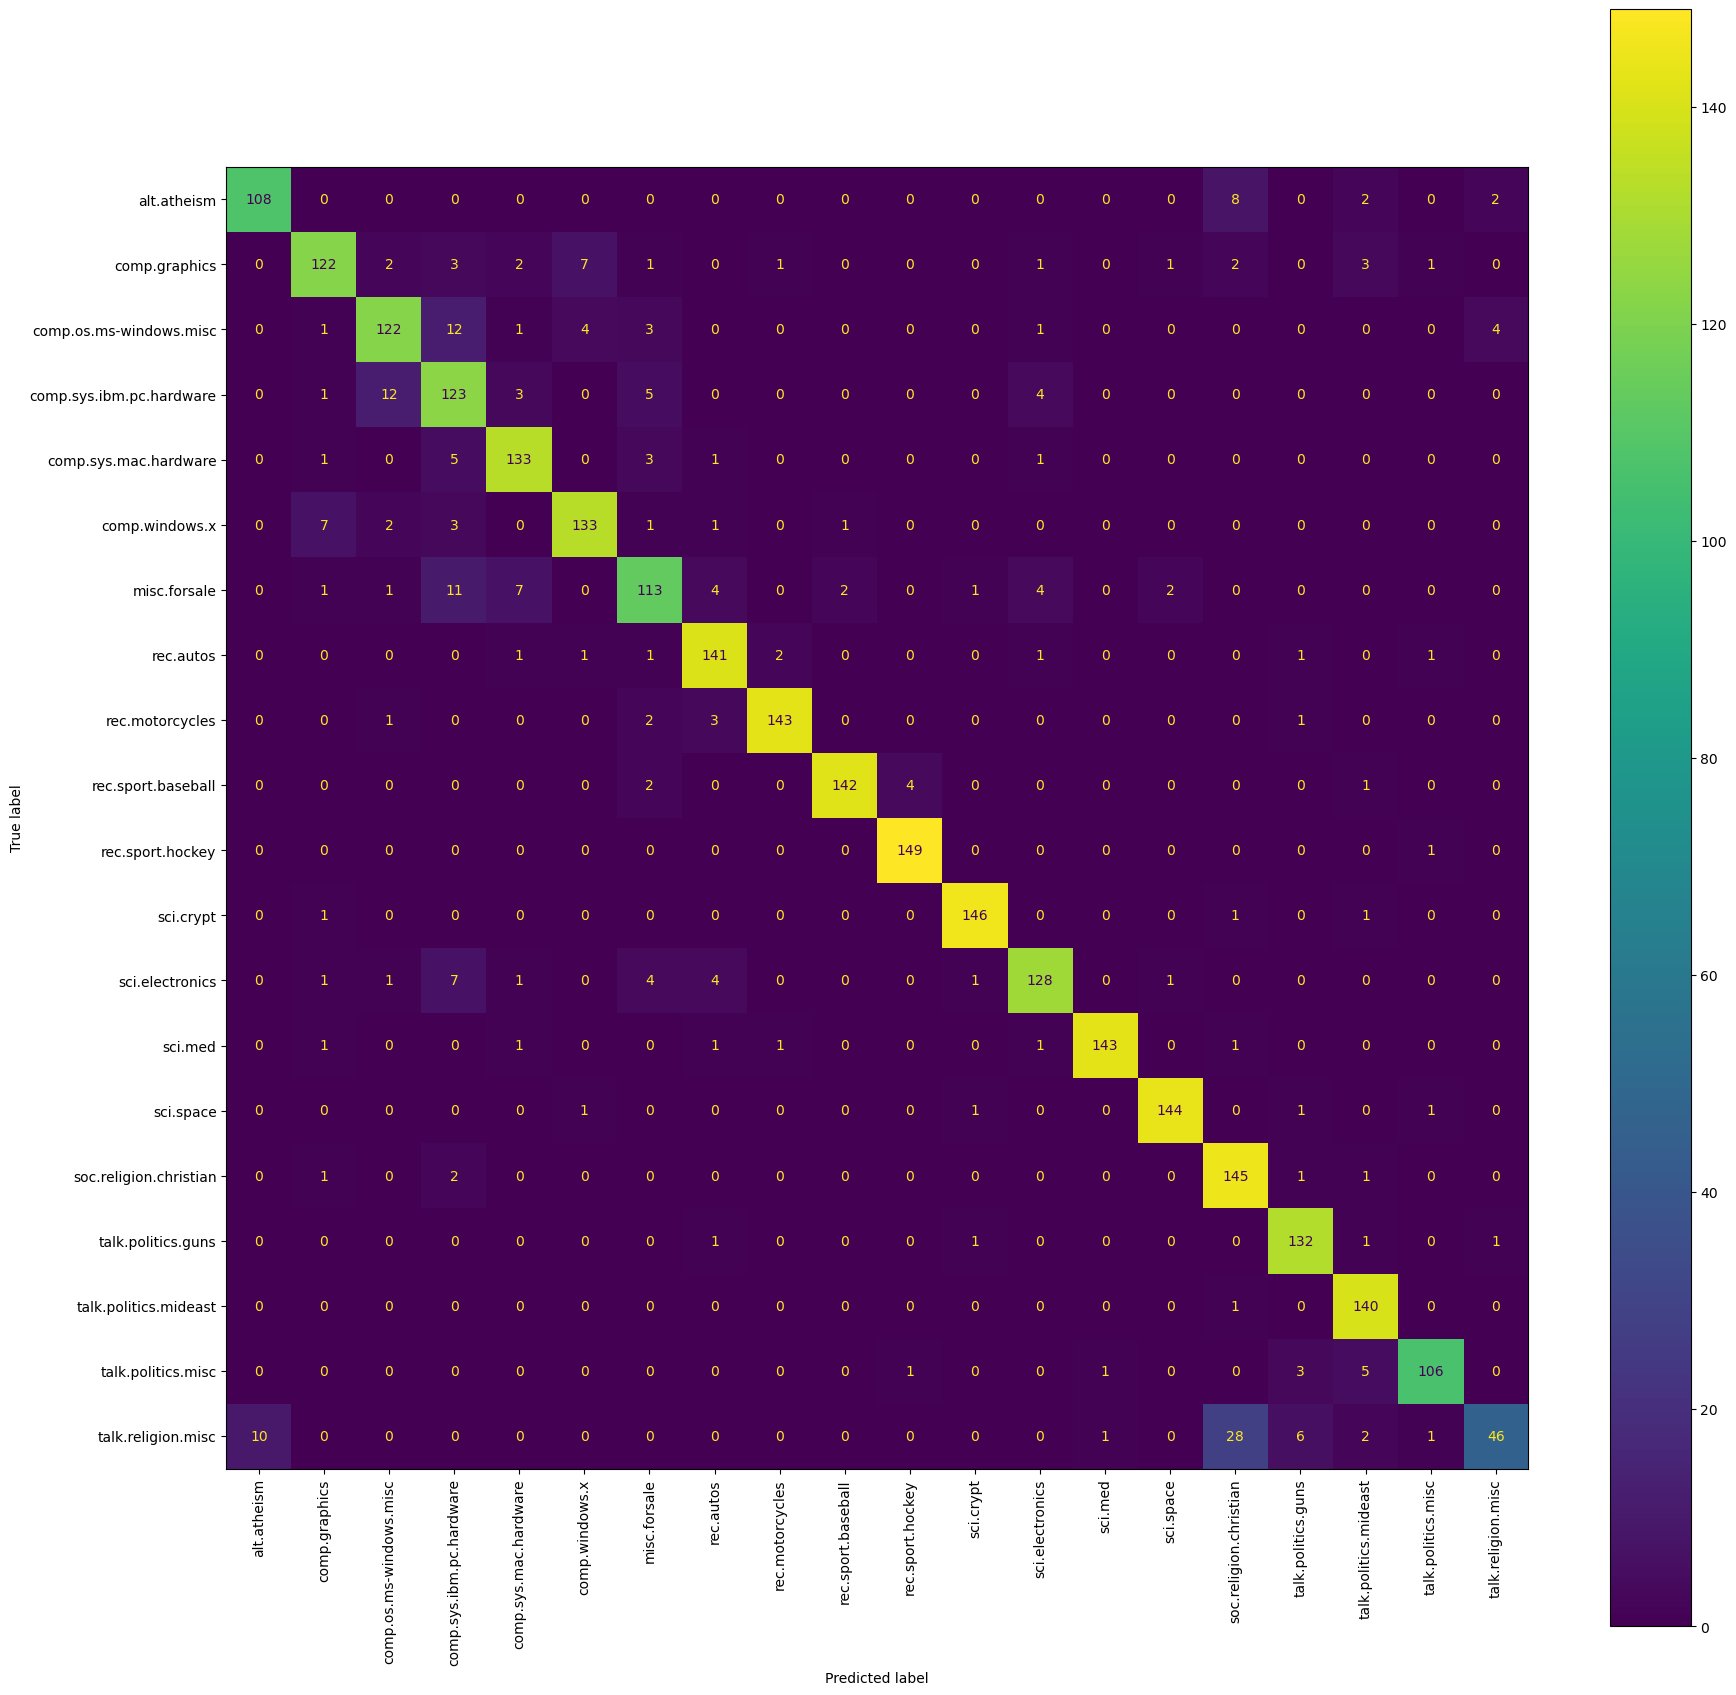

In [22]:

from sklearn.metrics import ConfusionMatrixDisplay

# 3. Plot the confusion matrix of our predictions


fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(our_model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);


In [23]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred, target_names=our_model.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.92      0.90      0.91       120
           comp.graphics       0.89      0.84      0.86       146
 comp.os.ms-windows.misc       0.87      0.82      0.84       148
comp.sys.ibm.pc.hardware       0.74      0.83      0.78       148
   comp.sys.mac.hardware       0.89      0.92      0.91       144
          comp.windows.x       0.91      0.90      0.90       148
            misc.forsale       0.84      0.77      0.80       146
               rec.autos       0.90      0.95      0.92       149
         rec.motorcycles       0.97      0.95      0.96       150
      rec.sport.baseball       0.98      0.95      0.97       149
        rec.sport.hockey       0.97      0.99      0.98       150
               sci.crypt       0.97      0.98      0.98       149
         sci.electronics       0.91      0.86      0.89       148
                 sci.med       0.99      0.96      0.97       149
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [24]:
my_sentence = 'What the Hell should I choose??? I`d rather write nothing and copy from somewhere, who cares!'

# 1. Apply the text pipeline to your sentence
my_sentence_cleaned = pipeline_function(my_sentence)

print(my_sentence_cleaned)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X_transformed = vectorizer.transform([my_sentence_cleaned])

# 3. Use the model to predict your new `X`. 
prediction = our_model.predict(X_transformed)
# 4. Print the prediction
print(prediction)


hell choos id rather write noth copi somewher care
['soc.religion.christian']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [25]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
df.shape


(86460, 3)

In [26]:
# apply the text pipeline to our text data column
df['tweet_after_pipelined'] = df['Tweet'].apply(pipeline_function)

print("ORIGINAL TEXT:\n", df['Tweet'][2])
print('-'*999)
print("CLEANDED TEXT:\n", df['tweet_after_pipelined'][2])

ORIGINAL TEXT:
 RT @NBCLatino: .@RepDarrenSoto noted that Hurricane Maria has left approximately $90 billion in damages. 

Congress has allocated about $18…
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
# 1. Define our `X` and `y` data. 
X = df['tweet_after_pipelined']
y = df['Party']


In [28]:
# Initialize our vectorizer
vectorizer_tweet = TfidfVectorizer()

In [29]:
# This makes our vocab matrix
vectorizer_tweet.fit(X)

TfidfVectorizer()

In [30]:
# This transforms our documents into vectors.
X = vectorizer_tweet.transform(X)

In [31]:
# Split our data into testing and training like always. 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=45, stratify=y)


# Saving the raw text for later
X_train_tweet = X_train
X_test_tweet = X_test

In [32]:
# 1. Initalize an empty model. 
tweet_detect_model = MultinomialNB(alpha=.05)

In [33]:
# Fit our model with our training data.
tweet_detect_model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

In [34]:
# 1. Make new predictions of our testing data. 

y_pred = tweet_detect_model.predict(X_test)
y_pred

array(['Democrat', 'Democrat', 'Republican', ..., 'Democrat',
       'Republican', 'Republican'], dtype='<U10')

In [35]:
# 2. Print the accuracy of the model. 
accuracy =  tweet_detect_model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.809623


In [36]:
from sklearn.metrics import f1_score
import numpy as np

# in order to get f1 score > 82%

# Convert to integers, e.g., 'Democrat' to 0 and 'Republican' to 1
y_test_encoded = np.where(y_test == 'Republican', 1, 0)

# Making predicted probabilites of our testing data

y_pred_prob = tweet_detect_model.predict_proba(X_test)[:, 1]

# Choosing Default Threshold
threshold = 0.4

y_pred = (y_pred_prob > threshold).astype(int)

# Calculate F1-score
f1 = f1_score(y_test_encoded, y_pred)

print("F1-Score: %f" % f1)

F1-Score: 0.821561


Adjusting the threshold can help us 

In [37]:
# manual prediction
my_tweet = 'the on going war is all middle east fault, USA stands with no one '

# 1. Apply the text pipeline to our sentence
my_tweet_cleaned = pipeline_function(my_tweet)

print(my_tweet_cleaned)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X_transformed = vectorizer_tweet.transform([my_tweet_cleaned])

# 3. Use the model to predict your new `X`. 
prediction = tweet_detect_model.predict(X_transformed)

# 4. Print the prediction
print(prediction)

go war middl east fault usa stand one
['Democrat']
